In [2]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000   

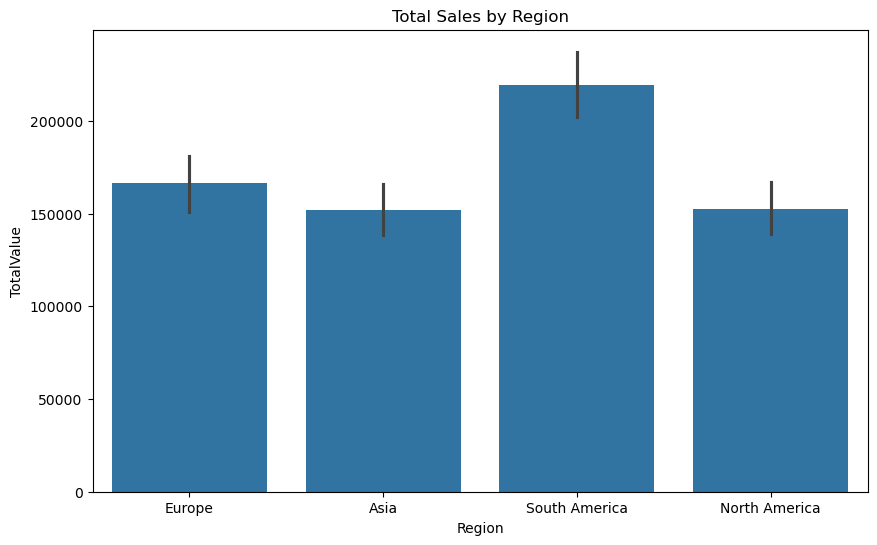

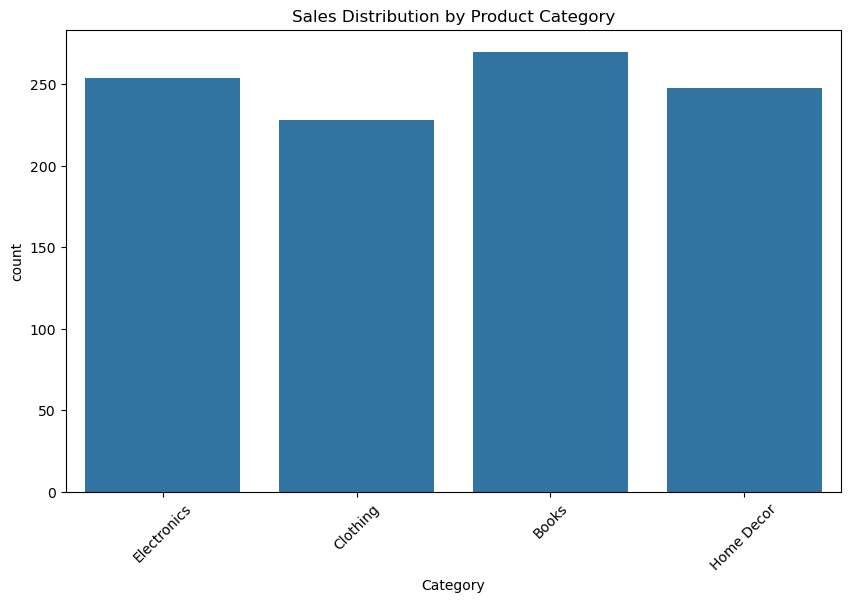

In [4]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Summary statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Total sales by region
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_data, x='Region', y='TotalValue', estimator=sum)
plt.title('Total Sales by Region')
plt.show()

# Sales distribution by product category
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='Category')
plt.title('Sales Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare data for similarity calculation
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_y': 'mean'  # Using the product price from Products.csv
}).reset_index()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue', 'Quantity', 'Price_y']])

# Calculate similarity scores
similarity_matrix = cosine_similarity(scaled_features)

# Create a DataFrame for lookalikes
lookalike_df = pd.DataFrame(similarity_matrix, index=customer_features['CustomerID'], columns=customer_features['CustomerID'])

# Get top 3 lookalikes for the first 20 customers
lookalike_results = {}
for customer in customer_features['CustomerID'][:20]:
    similar_customers = lookalike_df[customer].nlargest(4).iloc[1:]  # Exclude self
    lookalike_results[customer] = list(zip(similar_customers.index, similar_customers.values))

# Convert to DataFrame dynamically
lookalike_results_list = []
for customer, lookalikes in lookalike_results.items():
    row = [customer]  # Start with the customer ID
    for lookalike in lookalikes:
        row.extend(lookalike)  # Add lookalike ID and score
    lookalike_results_list.append(row)

# Create DataFrame with dynamic columns
max_lookalikes = 3  # We want to show up to 3 lookalikes
columns = ['CustomerID'] + [f'Lookalike{i+1}' for i in range(max_lookalikes)] + [f'Score{i+1}' for i in range(max_lookalikes)]
lookalike_results_df = pd.DataFrame(lookalike_results_list, columns=columns)

# Fill NaN for customers with fewer than 3 lookalikes
lookalike_results_df.fillna('', inplace=True)

# Save to CSV
lookalike_results_df.to_csv('BHAVNESH_SHARMA_Lookalike.csv', index=False)

In [21]:
import pandas as pd


lookalike_results_df = pd.read_csv('BHAVNESH_SHARMA_Lookalike.csv')


print(lookalike_results_df.head())

  CustomerID Lookalike1  Lookalike2 Lookalike3    Score1 Score2    Score3
0      C0001      C0103    0.997573      C0092  0.996879  C0135  0.992736
1      C0002      C0029    0.999854      C0077  0.996104  C0157  0.995478
2      C0003      C0111    0.998487      C0190  0.996656  C0038  0.990133
3      C0004      C0165    0.998390      C0162  0.998087  C0075  0.996932
4      C0005      C0167    0.999972      C0020  0.999714  C0128  0.998762


C:\Users\bhav3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhav3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhav3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bhav3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

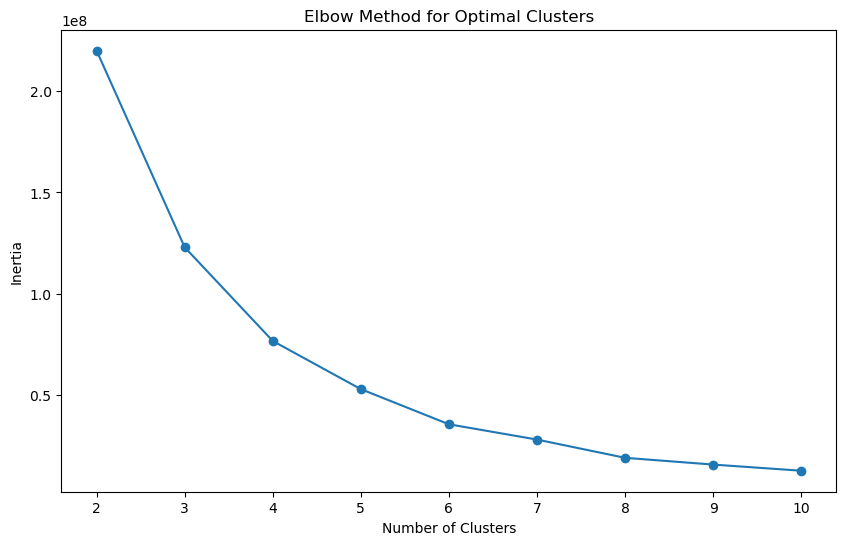

Davies-Bouldin Index: 0.574301044342154


C:\Users\bhav3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Assuming merged_data is already defined and contains the necessary columns
# Prepare data for clustering
X = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Price_y': 'mean'  # Using the product price from Products.csv
}).reset_index()

# Determine optimal number of clusters (2-10)
inertia = []
db_index = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X[['TotalValue', 'Quantity', 'Price_y']])  # Use Price_y here
    inertia.append(kmeans.inertia_)
    db_index.append(davies_bouldin_score(X[['TotalValue', 'Quantity', 'Price_y']], kmeans.labels_))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
X['Cluster'] = kmeans.fit_predict(X[['TotalValue', 'Quantity', 'Price_y']])  # Use Price_y here

# Calculate DB Index
db_index_value = davies_bouldin_score(X[['TotalValue', 'Quantity', 'Price_y']], X['Cluster'])

# Print the DB Index value
print("Davies-Bouldin Index:", db_index_value)

# Save clustering results
X.to_csv('BHAVNESH_SHARMA_Clustering.csv', index=False)  # Replace with your name